In [20]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

## Import data

In [21]:
# test = pd.read_csv('test.csv') # doesn't have labels
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

In [22]:
df = pd.concat([train, 
                  valid, 
#                  test,
                  ], axis=0)

In [23]:
df.rename(columns={'label': 'is_clickbait'}, inplace=True)

#### Select columns

In [24]:
df = df[['title','is_clickbait']]
df.head()

,title,is_clickbait
0,China and Economic Reform: Xi Jinping’s Track ...,news
1,Trade to Be a Big Topic in Theresa May’s U.S. ...,news
2,"The Top Beaches In The World, According To Nat...",clickbait
3,Sheriff’s Report Provides New Details on Tamir...,clickbait
4,Surgeon claiming he will transplant volunteer'...,news


## EDA

#### Basic info about the dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28423 entries, 0 to 3551
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         22780 non-null  object
 1   is_clickbait  28423 non-null  object
dtypes: object(2)
memory usage: 666.2+ KB


In [26]:
df.describe()

,title,is_clickbait
count,22780,28423
unique,22642,3
top,NBC NewsVerifizierter Account,news
freq,22,16738


Text(0.5, 1.0, 'Label Counts')

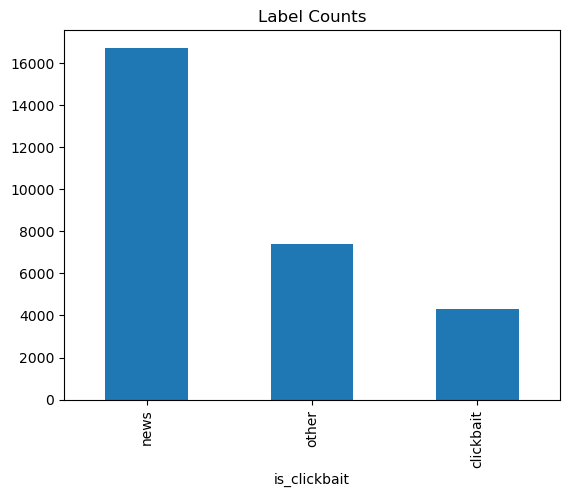

In [27]:
# as numbers
df.is_clickbait.value_counts()
# as percentage
df.is_clickbait.value_counts(normalize=True)
# plot
df['is_clickbait'].value_counts().plot(kind='bar').set_title('Label Counts')

#### Check for NaNs in the dataset

In [28]:
df.isna().sum()

title           5643
is_clickbait       0
dtype: int64

## Data preparation

In [29]:
# remove rows with no label
df = df[~df['is_clickbait'].isna()]
# remove rows with no title
df = df[~df['title'].isna()]

In [30]:
# remap labels to 0 and 1 (0 = not clickbait, 1 = clickbait)
df['is_clickbait'] = np.where(df['is_clickbait'] == 'clickbait', 1, 0)

In [31]:
df.head()

,title,is_clickbait
0,China and Economic Reform: Xi Jinping’s Track ...,0
1,Trade to Be a Big Topic in Theresa May’s U.S. ...,0
2,"The Top Beaches In The World, According To Nat...",1
3,Sheriff’s Report Provides New Details on Tamir...,1
4,Surgeon claiming he will transplant volunteer'...,0


In [32]:
# export to csv
df.to_csv('labeled.csv', index=False)